In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
df = pd.read_csv(url,names=['sepal length','sepal width','petal length','petal_width','target'])

In [4]:
features = ['sepal length','sepal width','petal length','petal_width']
x = df.loc[:,features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents,
                           columns=['principal component 1','principal component 2'])
finalDf = pd.concat([principalDf,df[['target']]],axis=1)

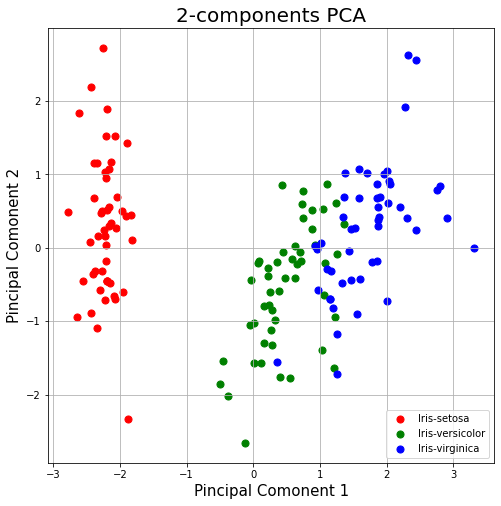

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Pincipal Comonent 1', fontsize=15)
ax.set_ylabel('Pincipal Comonent 2', fontsize=15)
ax.set_title('2-components PCA', fontsize=20)

targets = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['r','g','b']
for target,color in zip(targets,colors):
    itk = finalDf['target'] == target
    ax.scatter(finalDf.loc[itk,'principal component 1'],
               finalDf.loc[itk,'principal component 2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [9]:
pca.explained_variance_ratio_   

array([0.72770452, 0.23030523])